# Data Exploration and Preprocessing - Version Corrigée

Ce notebook fournit une vue d'ensemble du dataset et effectue l'exploration et le préprocessing initial des données.

## Objectifs:
- Charger et explorer le dataset d'actualités
- Analyser les caractéristiques et distributions du texte
- Visualiser les patterns des données
- Préprocesser le texte pour les tâches NLP
- Générer l'analyse de fréquence des mots et nuages de mots

In [3]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)

print('✅ Bibliothèques importées avec succès!')

✅ Bibliothèques importées avec succès!


## 1. Charger et Explorer le Dataset

In [4]:
# Charger le dataset d'exemple
df = pd.read_csv('../data/sample/sample_news_data.csv')

print("Forme du dataset:", df.shape)
print("\nNoms des colonnes:", df.columns.tolist())
print("\nPremières lignes:")
df.head()

Forme du dataset: (10, 5)

Noms des colonnes: ['id', 'title', 'text', 'category', 'sentiment']

Premières lignes:


,id,title,text,category,sentiment
0,1,Tech Giant Announces Revolutionary AI Breakthr...,A major technology company has announced a gro...,technology,positive
1,2,Climate Change Summit Reaches Historic Agreement,World leaders have reached a historic agreemen...,environment,positive
2,3,Economic Uncertainty Continues to Impact Markets,Financial markets continue to experience volat...,economy,negative
3,4,New Medical Research Shows Promise for Cancer ...,Researchers have published promising results f...,health,positive
4,5,Education System Faces Ongoing Challenges,The education system continues to grapple with...,education,neutral


In [5]:
# Informations de base sur le dataset
print("Informations sur le dataset:")
print(df.info())

print("\nValeurs manquantes:")
print(df.isnull().sum())

print("\nDescription du dataset:")
print(df.describe(include='all'))

Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10 non-null     int64 
 1   title      10 non-null     object
 2   text       10 non-null     object
 3   category   10 non-null     object
 4   sentiment  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 532.0+ bytes
None

Valeurs manquantes:
id           0
title        0
text         0
category     0
sentiment    0
dtype: int64

Description du dataset:
              id                                              title  \
count   10.00000                                                 10   
unique       NaN                                                 10   
top          NaN  Tech Giant Announces Revolutionary AI Breakthr...   
freq         NaN                                                  1   
mean     5.50000                                

## 2. Analyse du Texte

In [6]:
# Calculer les statistiques du texte
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['sentence_count'] = df['text'].str.count(r'[.!?]') + 1

print("Statistiques du texte:")
print(f"Longueur moyenne du texte: {df['text_length'].mean():.1f} caractères")
print(f"Nombre moyen de mots: {df['word_count'].mean():.1f} mots")
print(f"Nombre moyen de phrases: {df['sentence_count'].mean():.1f} phrases")

print("\nDistribution de la longueur du texte:")
print(df[['text_length', 'word_count', 'sentence_count']].describe())

Statistiques du texte:
Longueur moyenne du texte: 385.2 caractères
Nombre moyen de mots: 50.6 mots
Nombre moyen de phrases: 4.0 phrases

Distribution de la longueur du texte:
       text_length  word_count  sentence_count
count     10.00000   10.000000            10.0
mean     385.20000   50.600000             4.0
std       36.39536    4.880801             0.0
min      337.00000   44.000000             4.0
25%      362.50000   47.500000             4.0
50%      380.50000   49.500000             4.0
75%      405.75000   52.500000             4.0
max      461.00000   59.000000             4.0


## 3. Distribution des Catégories et Sentiments

In [7]:
# Distribution des catégories
print("Distribution des catégories:")
category_counts = df['category'].value_counts()
print(category_counts)

print("\nDistribution des sentiments:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

Distribution des catégories:
category
technology        2
environment       1
economy           1
health            1
education         1
sports            1
culture           1
infrastructure    1
science           1
Name: count, dtype: int64

Distribution des sentiments:
sentiment
positive    6
negative    2
neutral     2
Name: count, dtype: int64


## 4. Visualisations

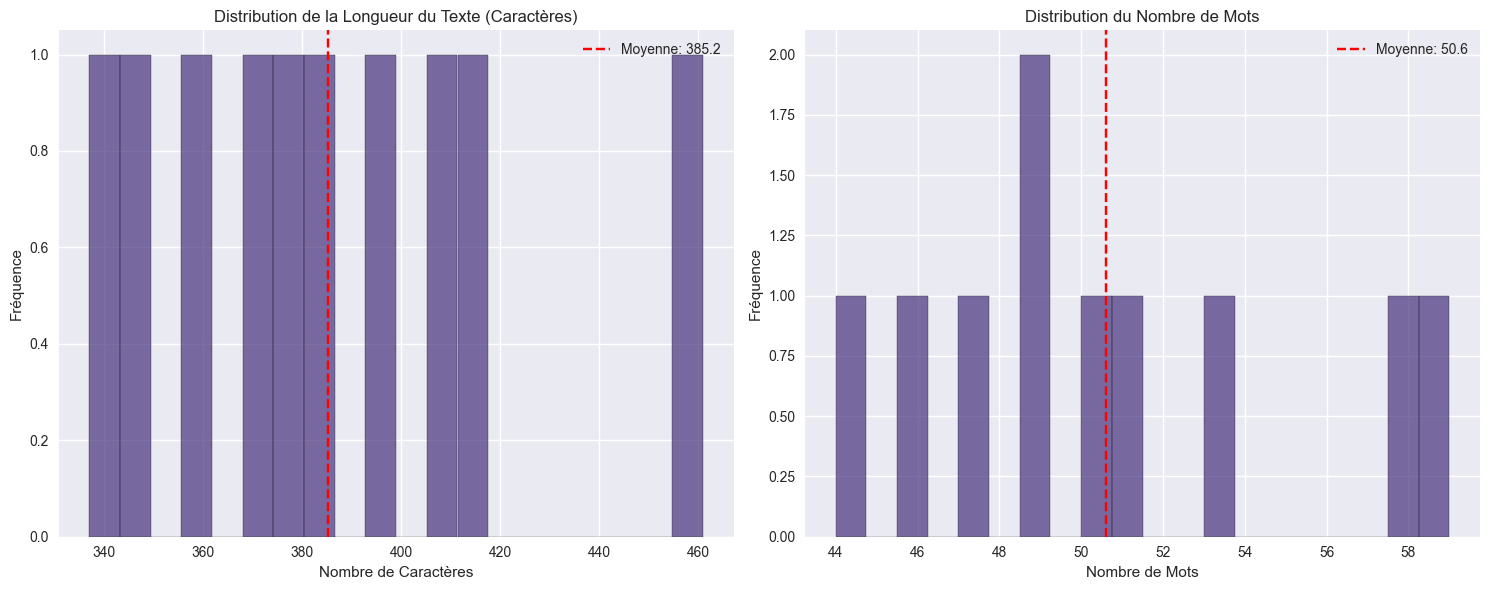

In [8]:
# Graphique de distribution de la longueur du texte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Distribution de la longueur en caractères
ax1.hist(df['text_length'], bins=20, alpha=0.7, edgecolor='black')
ax1.set_title('Distribution de la Longueur du Texte (Caractères)')
ax1.set_xlabel('Nombre de Caractères')
ax1.set_ylabel('Fréquence')
ax1.axvline(df['text_length'].mean(), color='red', linestyle='--', 
           label=f'Moyenne: {df["text_length"].mean():.1f}')
ax1.legend()

# Distribution du nombre de mots
ax2.hist(df['word_count'], bins=20, alpha=0.7, edgecolor='black')
ax2.set_title('Distribution du Nombre de Mots')
ax2.set_xlabel('Nombre de Mots')
ax2.set_ylabel('Fréquence')
ax2.axvline(df['word_count'].mean(), color='red', linestyle='--',
           label=f'Moyenne: {df["word_count"].mean():.1f}')
ax2.legend()

plt.tight_layout()
plt.show()

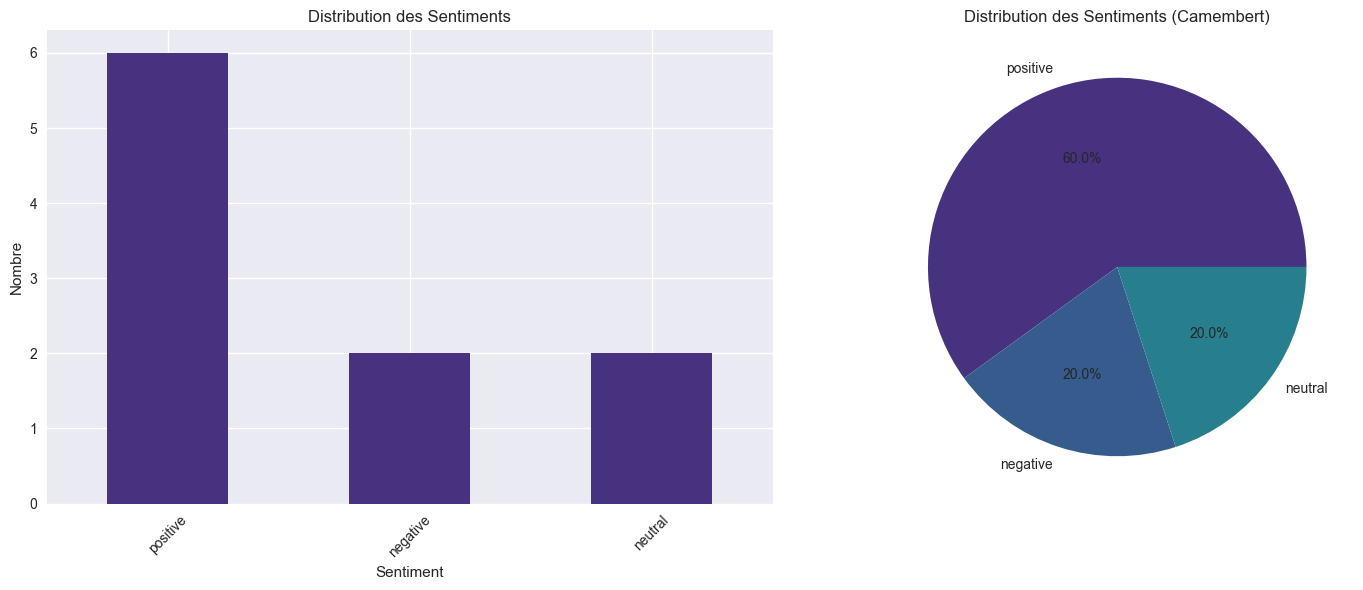

In [9]:
# Distribution des sentiments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Graphique en barres
sentiment_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Distribution des Sentiments')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Nombre')
ax1.tick_params(axis='x', rotation=45)

# Graphique en secteurs
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
ax2.set_title('Distribution des Sentiments (Camembert)')

plt.tight_layout()
plt.show()

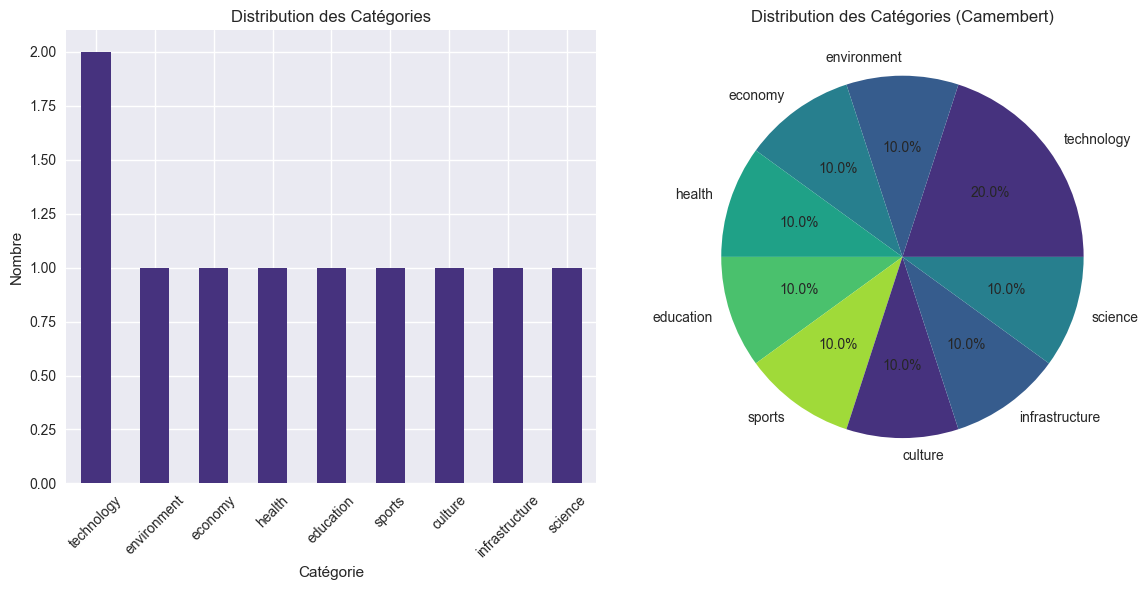

In [10]:
# Distribution des catégories
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
category_counts.plot(kind='bar')
plt.title('Distribution des Catégories')
plt.xlabel('Catégorie')
plt.ylabel('Nombre')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution des Catégories (Camembert)')

plt.tight_layout()
plt.show()

## 5. Préprocessing du Texte (Version Simplifiée)

In [11]:
# Import des outils de préprocessing
import re
import string
from collections import Counter

def simple_preprocess(text):
    """Fonction simple de préprocessing du texte"""
    if not isinstance(text, str):
        return ""
    
    # Convertir en minuscules
    text = text.lower()
    
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Appliquer le préprocessing
df['processed_text'] = df['text'].apply(simple_preprocess)

print("Exemples de texte original vs préprocessé:")
for i in range(3):
    print(f"\nExemple {i+1}:")
    print(f"Original: {df.iloc[i]['text'][:100]}...")
    print(f"Préprocessé: {df.iloc[i]['processed_text'][:100]}...")

Exemples de texte original vs préprocessé:

Exemple 1:
Original: A major technology company has announced a groundbreaking advancement in artificial intelligence tha...
Préprocessé: a major technology company has announced a groundbreaking advancement in artificial intelligence tha...

Exemple 2:
Original: World leaders have reached a historic agreement at the latest climate change summit, committing to a...
Préprocessé: world leaders have reached a historic agreement at the latest climate change summit committing to am...

Exemple 3:
Original: Financial markets continue to experience volatility amid ongoing economic uncertainty. Investors rem...
Préprocessé: financial markets continue to experience volatility amid ongoing economic uncertainty investors rema...


## 6. Analyse de Fréquence des Mots

In [12]:
# Analyser la fréquence des mots
all_words = []
for text in df['processed_text']:
    words = text.split()
    # Filtrer les mots trop courts
    words = [word for word in words if len(word) > 2]
    all_words.extend(words)

# Compter les mots les plus fréquents
word_freq = Counter(all_words)
top_words = word_freq.most_common(20)

print("Top 20 des mots les plus fréquents:")
for word, freq in top_words:
    print(f"{word}: {freq}")

Top 20 des mots les plus fréquents:
the: 26
and: 21
for: 8
have: 6
that: 5
are: 5
with: 4
new: 4
understanding: 3
significant: 3
various: 3
education: 3
funding: 3
from: 3
strategies: 3
these: 3
infrastructure: 3
technology: 2
has: 2
system: 2


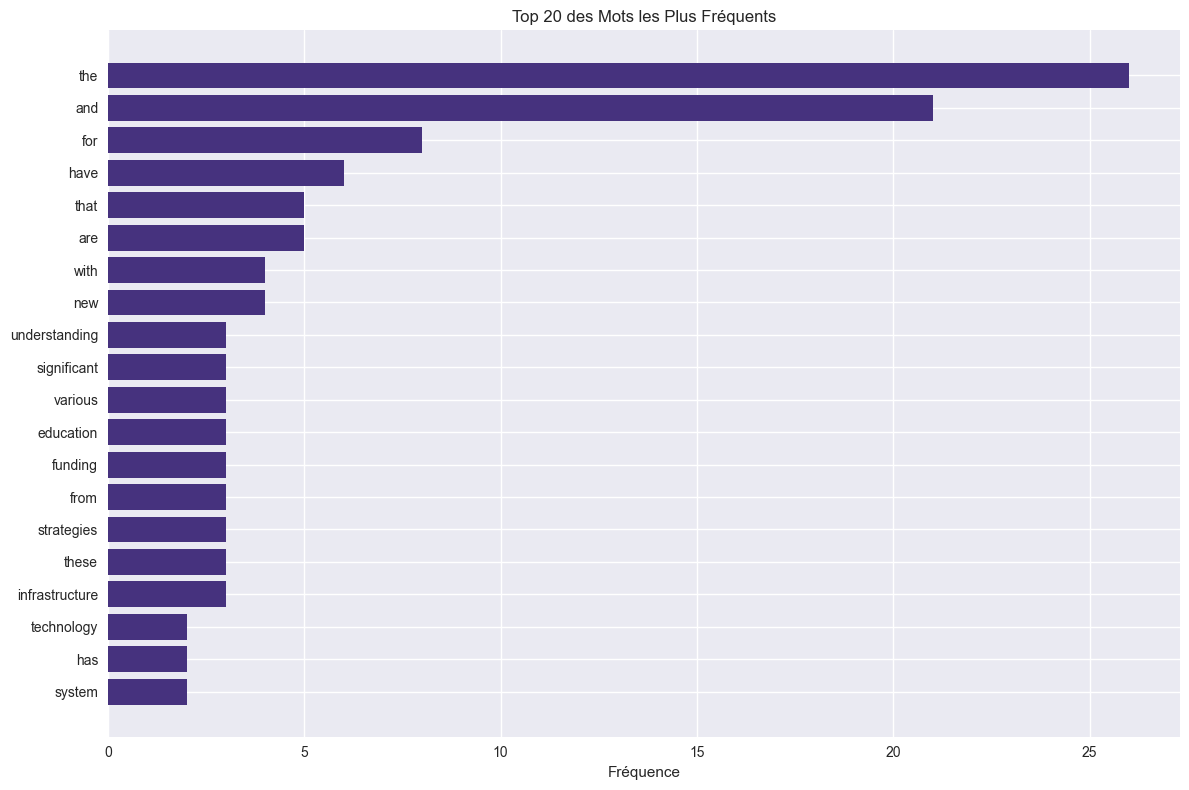

In [13]:
# Visualiser la fréquence des mots
plt.figure(figsize=(12, 8))
words, frequencies = zip(*top_words)

plt.barh(range(len(words)), frequencies)
plt.yticks(range(len(words)), words)
plt.xlabel('Fréquence')
plt.title('Top 20 des Mots les Plus Fréquents')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 7. Nuage de Mots (Version Simplifiée)

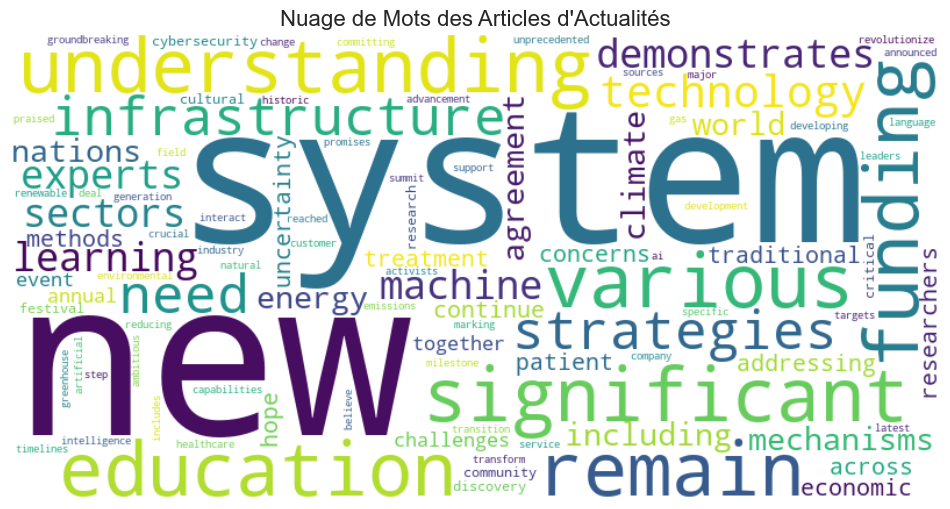

In [14]:
# Créer un nuage de mots simple avec matplotlib
try:
    from wordcloud import WordCloud
    
    # Combiner tout le texte
    combined_text = ' '.join(df['processed_text'])
    
    # Créer le nuage de mots
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        colormap='viridis'
    ).generate(combined_text)
    
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuage de Mots des Articles d\'Actualités', fontsize=16)
    plt.show()
    
except ImportError:
    print("⚠️ WordCloud non disponible. Voici les mots les plus fréquents:")
    for word, freq in top_words[:10]:
        print(f"{'█' * (freq * 2)} {word} ({freq})")

## 8. Sauvegarder les Données Préprocessées

In [15]:
# Sauvegarder le dataset préprocessé
df.to_csv('../data/processed/processed_news_data.csv', index=False)
print("Données préprocessées sauvegardées dans '../data/processed/processed_news_data.csv'")

print("\n✅ Exploration des données terminée!")
print(f"Le dataset contient {len(df)} articles répartis en {df['category'].nunique()} catégories")
print(f"Distribution des sentiments: {dict(df['sentiment'].value_counts())}")
print(f"Longueur moyenne du texte: {df['text_length'].mean():.1f} caractères")
print(f"Nombre moyen de mots: {df['word_count'].mean():.1f} mots")

Données préprocessées sauvegardées dans '../data/processed/processed_news_data.csv'

✅ Exploration des données terminée!
Le dataset contient 10 articles répartis en 9 catégories
Distribution des sentiments: {'positive': 6, 'negative': 2, 'neutral': 2}
Longueur moyenne du texte: 385.2 caractères
Nombre moyen de mots: 50.6 mots
